In [1]:
# for loading/processing the images  
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array 
from tensorflow.keras.applications.vgg16 import preprocess_input 

In [2]:
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

In [3]:
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [5]:
# #Converting the images in a folder from .jpg to .png
# from PIL import Image
# import os

# directory = r'C:\Users\USER\Downloads\Dataset\StainClustering'
# c=1
# for filename in os.listdir(directory):
#     if filename.endswith(".jpg"):
#         im = Image.open(filename)
#         name='img'+str(c)+'.png'
#         rgb_im = im.convert('RGB')
#         rgb_im.save(name)
#         c+=1
#         print(os.path.join(directory, filename))
#         continue
#     else:
#         continue


In [6]:
path = r"C:\Users\Faithgokz\Documents\Dataset\First_Analysis\GiemsaOptical - Copy"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
malariaImg = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        malariaImg.append(file.name)

In [7]:
# print(malariaImg[:50])

In [8]:
# load the model first and pass as an argument and remove output layer
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [9]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [10]:
data = {}
p = "malariaImg_featuresStain.pkl"

# loop through each image in the dataset
for malaria in malariaImg:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(malaria,model)
        data[malaria] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        if not os.path.isfile(p):
            with open(p,'wb') as file:
                pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

1/1 [==============================] - 0s 406ms/step


1/1 [==============================] - 0s 272ms/step


1/1 [==============================] - 0s 296ms/step


1/1 [==============================] - 0s 390ms/step


(497, 1, 4096)

In [11]:
# reshape to get a number of samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(497, 4096)

19 components capture 90% of the variance.


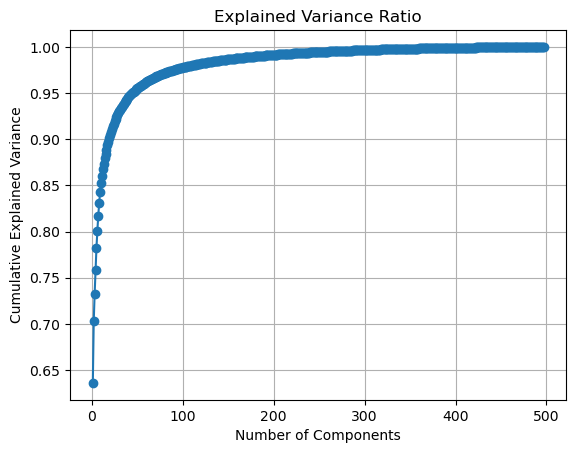

In [12]:
#Determining the best number of components
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA()

# Perform PCA on the data
pca.fit(feat)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components that capture 90% of the variance
n_components = np.argmax(cumulative_variance >= 0.9) + 1

# Check if 90% of the variance is captured
if cumulative_variance[n_components - 1] >= 0.9:
    print(f"{n_components} components capture 90% of the variance.")
else:
    print("Less than 90% of the variance is captured.")

#Regenerate response
# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
# plt.show()
plt.savefig('GiemsaOptical_PCA.png', dpi=300, transparent=False)

In [30]:
pca = PCA(n_components=19, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [31]:
print(f"Components before PCA: {feat.shape[1]}")

Components before PCA: 4096


In [32]:
print(f"Components after PCA: {pca.n_components}")

Components after PCA: 19


In [33]:
kmeans = KMeans(n_init=20, n_clusters=2, random_state=42)
x_labels = kmeans.fit_predict(x)

C:\Users\Faithgokz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [34]:
print (x_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [35]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

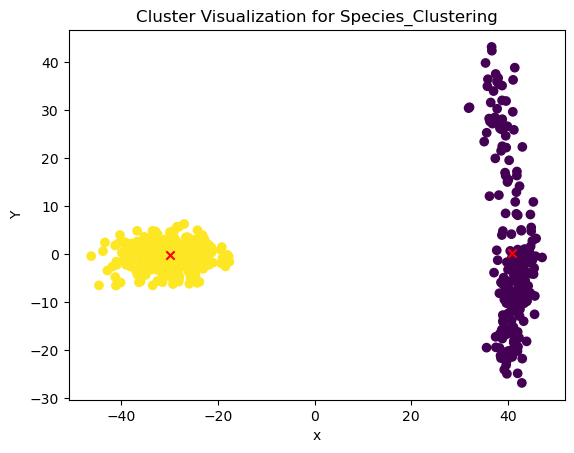

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
    
# Visualize clusters
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker= 'x')
    
plt.title('Cluster Visualization for Species_Clustering')
plt.xlabel('x')
plt.ylabel('Y')
# plt.show()
plt.savefig('GiemsaOptical_Clustering.png', dpi=300, transparent=False)

C:\Users\Faithgokz\AppData\Local\Temp\ipykernel_13936\1485527304.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', num_clusters)


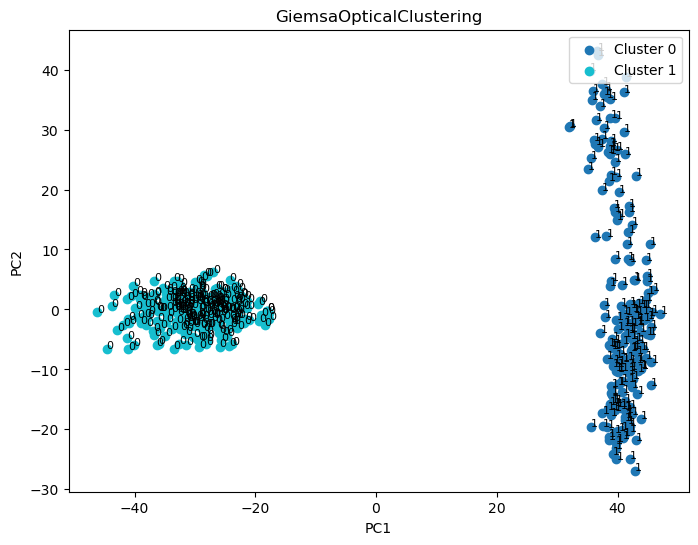

In [38]:
import numpy as np

malariaimgD_labels = []
for file in malariaImg:
    if file[:2] == 'Su':
        malariaimgD_labels.append(0)
    else: 
        malariaimgD_labels.append(1)

# Get unique cluster labels and their corresponding colors
unique_labels = np.unique(kmeans.labels_)
num_clusters = len(unique_labels)

colormap = plt.cm.get_cmap('tab10', num_clusters)

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter_plots = []


for i in range(num_clusters):
    cluster_points = x[x_labels == i]
    cluster_labels = np.array(malariaimgD_labels)[x_labels == i]
    scatter_plot = plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colormap(i)], label=f'Cluster {i}')
    #scatter_plots.append(scatter_plot)
    
    for j in range(len(cluster_points)):
        plt.annotate(cluster_labels[j], (cluster_points[j, 0], cluster_points[j, 1]), fontsize=8)

    scatter_plots.append(scatter_plot)
    

plt.title('GiemsaOpticalClustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=scatter_plots, loc='upper right')
# plt.show()
plt.savefig('GiemsaOptical_ClusteringPts.png', dpi=300, transparent=False)

C:\Users\Faithgokz\AppData\Local\Temp\ipykernel_13936\2867411568.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', num_clusters)


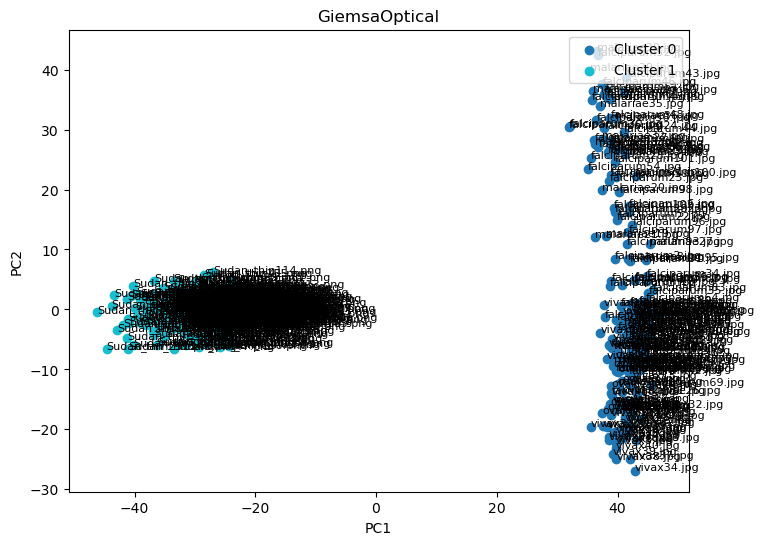

In [39]:
# Get unique cluster labels and their corresponding colors
unique_labels = np.unique(kmeans.labels_)
num_clusters = len(unique_labels)

colormap = plt.cm.get_cmap('tab10', num_clusters)

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter_plots = []

for i in range(num_clusters):
    cluster_points = x[x_labels == i]
    cluster_labels = np.array(malariaImg)[x_labels == i]
    scatter_plot = plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colormap(i)], label=f'Cluster {i}')
    #scatter_plots.append(scatter_plot)
    
    for j in range(len(cluster_points)):
        plt.annotate(cluster_labels[j], (cluster_points[j, 0], cluster_points[j, 1]), fontsize=8)

    scatter_plots.append(scatter_plot)
    

plt.title('GiemsaOptical')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=scatter_plots, loc='upper right')
# plt.show()

plt.savefig('GiemsaOptical_ClusteringPts.png', dpi=300, transparent=False)

In [40]:
#PEFORMANCE METRICS USING CH-Score
from sklearn.metrics import calinski_harabasz_score
def calculate_calinski_harabasz(data, labels):
    score = calinski_harabasz_score(data, labels)
    return score

data = x  # Your data points
labels = kmeans.labels_  # Cluster labels assigned by K-means algorithm
calinski_harabasz_score = calculate_calinski_harabasz(x, kmeans.labels_)
print("Calinski-Harabasz score:", calinski_harabasz_score)

Calinski-Harabasz score: 1127.099062440715


In [41]:
#len (groups[0])
f = open("GiemsaOpticalClustering0.txt", "w")
for name in groups[0]:
    f.write(name)
    f.write("\n")
f.close()

In [42]:
#len (groups[1])
f = open("GiemsaOpticalClustering1.txt", "w")
for name in groups[1]:
    f.write(name)
    f.write("\n")
f.close()

In [43]:
# # function that lets you view a cluster (based on identifier)        
# def view_cluster(cluster):
#     plt.figure(figsize = (25,25));
#     # gets the list of filenames for a cluster
#     files = groups[cluster]
#     if len(files) > 100:
#         print(f"Clipping cluster size from {len(files)} to 100")
#         files = files[:100]
#     # plot each image in the cluster
#     for index, file in enumerate(files):
#         plt.subplot(10,10,index+1);
#         img = load_img(file)
#         img = np.array(img)
#         plt.imshow(img)
#         plt.axis('off')

In [44]:
# view_cluster(0)

In [45]:
from sklearn.metrics import davies_bouldin_score
def calculate_davies_bouldin(data, labels):
    score = davies_bouldin_score(data, labels)
    return score

#PEFORMANCE METRICS USING DB-Score
data = x  # Your data points
labels = kmeans.labels_  # Cluster labels assigned by K-means algorithm
davies_bouldin_score = calculate_davies_bouldin(data, kmeans.labels_)
print("Davies-bouldin score:", davies_bouldin_score)


Davies-bouldin score: 0.6357360823341616


In [46]:
from sklearn.metrics import silhouette_score
X = x
labels = kmeans.labels_
# CalculatING THE Silhoutte Score
silhouette_avg = silhouette_score(X, labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.6058987
